### Due to hardware limitations, the model was trained on Google Colab. The trained weights are saved in the "runs/detect/train/weights" directory, and the "best.pt" file should be used for inference.

In [1]:
%pwd

'/content'

In [2]:
!ls

drive  sample_data


In [3]:
!unzip /content/drive/MyDrive/drowsiness.v11i.yolov11.zip -d /content/drive/MyDrive/Data

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-21_jpg.rf.ec734d6d931157aa119b1ee101736c36.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-2_jpg.rf.60cc6d489b8178008a58dc3338d53b6b.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-2_jpg.rf.77f0af1ad8050048faf877fa2c060ca7.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-2_jpg.rf.d620b9617450b8b9616653376b31ddc5.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-32_jpg.rf.1bbc0c8a5729c600723cedda2044f80d.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-32_jpg.rf.8de532a7a77644f13a69981d35e6ebff.txt  
 extracting: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-32_jpg.rf.e03f817ff7341b49c1c8d44793b8465f.txt  
  inflating: /content/drive/MyDrive/Data/train/labels/_-52-_mp4-36_jpg.rf.685ce78afdf4a77275768b29179a726c.txt  
  inflating: /content/drive/MyDrive/Data/train/l

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00


In [4]:
!nvidia-smi

Tue Oct 28 09:31:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch

torch.cuda.is_available()

True

In [13]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [14]:
!pwd

/content/drive/MyDrive


In [ ]:
def serialized_model_file(
    checkpoint="best",
    use_run="train",
):
    """
    Returns the serialized file path.
    """
    return f"runs/detect/{use_run}/weights/{checkpoint}.pt"

In [ ]:
# Model Training

import os
from ultralytics import YOLO


def train(
    data,
    use_run="train",
    fallback="yolo11x.pt",
    epochs=100,
    augment=True,
):

    cuda_available = torch.cuda.is_available()
    if not cuda_available:
        print("CUDA is not available, skipping train.")
        return

    model_file = serialized_model_file("last", use_run)

    if os.path.exists(model_file):
        resume_training = True
        use_model = model_file
    else:
        resume_training = False
        use_model = fallback

    model = YOLO(use_model)

    model.train(
        data=data,
        resume=resume_training,
        epochs=epochs,
        optimizer="AdamW",
        lr0=0.0001,
        imgsz=320,
        batch=32,
        augment=augment,
    )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
train(data="/content/drive/MyDrive/Data/data.yaml", use_run=None)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=

In [18]:
!ls -l runs/detect/train

total 4925
-rw------- 1 root root   1569 Oct 28 09:34 args.yaml
-rw------- 1 root root 279758 Oct 28 14:32 BoxF1_curve.png
-rw------- 1 root root 247277 Oct 28 14:32 BoxP_curve.png
-rw------- 1 root root 209298 Oct 28 14:32 BoxPR_curve.png
-rw------- 1 root root 244402 Oct 28 14:32 BoxR_curve.png
-rw------- 1 root root 219073 Oct 28 14:32 confusion_matrix_normalized.png
-rw------- 1 root root 182164 Oct 28 14:32 confusion_matrix.png
-rw------- 1 root root 144611 Oct 28 09:37 labels.jpg
-rw------- 1 root root  12090 Oct 28 13:59 results.csv
-rw------- 1 root root 260236 Oct 28 14:32 results.png
-rw------- 1 root root 249251 Oct 28 09:37 train_batch0.jpg
-rw------- 1 root root 247169 Oct 28 09:37 train_batch1.jpg
-rw------- 1 root root 222747 Oct 28 14:02 train_batch21690.jpg
-rw------- 1 root root 231707 Oct 28 14:02 train_batch21691.jpg
-rw------- 1 root root 217323 Oct 28 14:02 train_batch21692.jpg
-rw------- 1 root root 262031 Oct 28 09:37 train_batch2.jpg
-rw------- 1 root root 2700

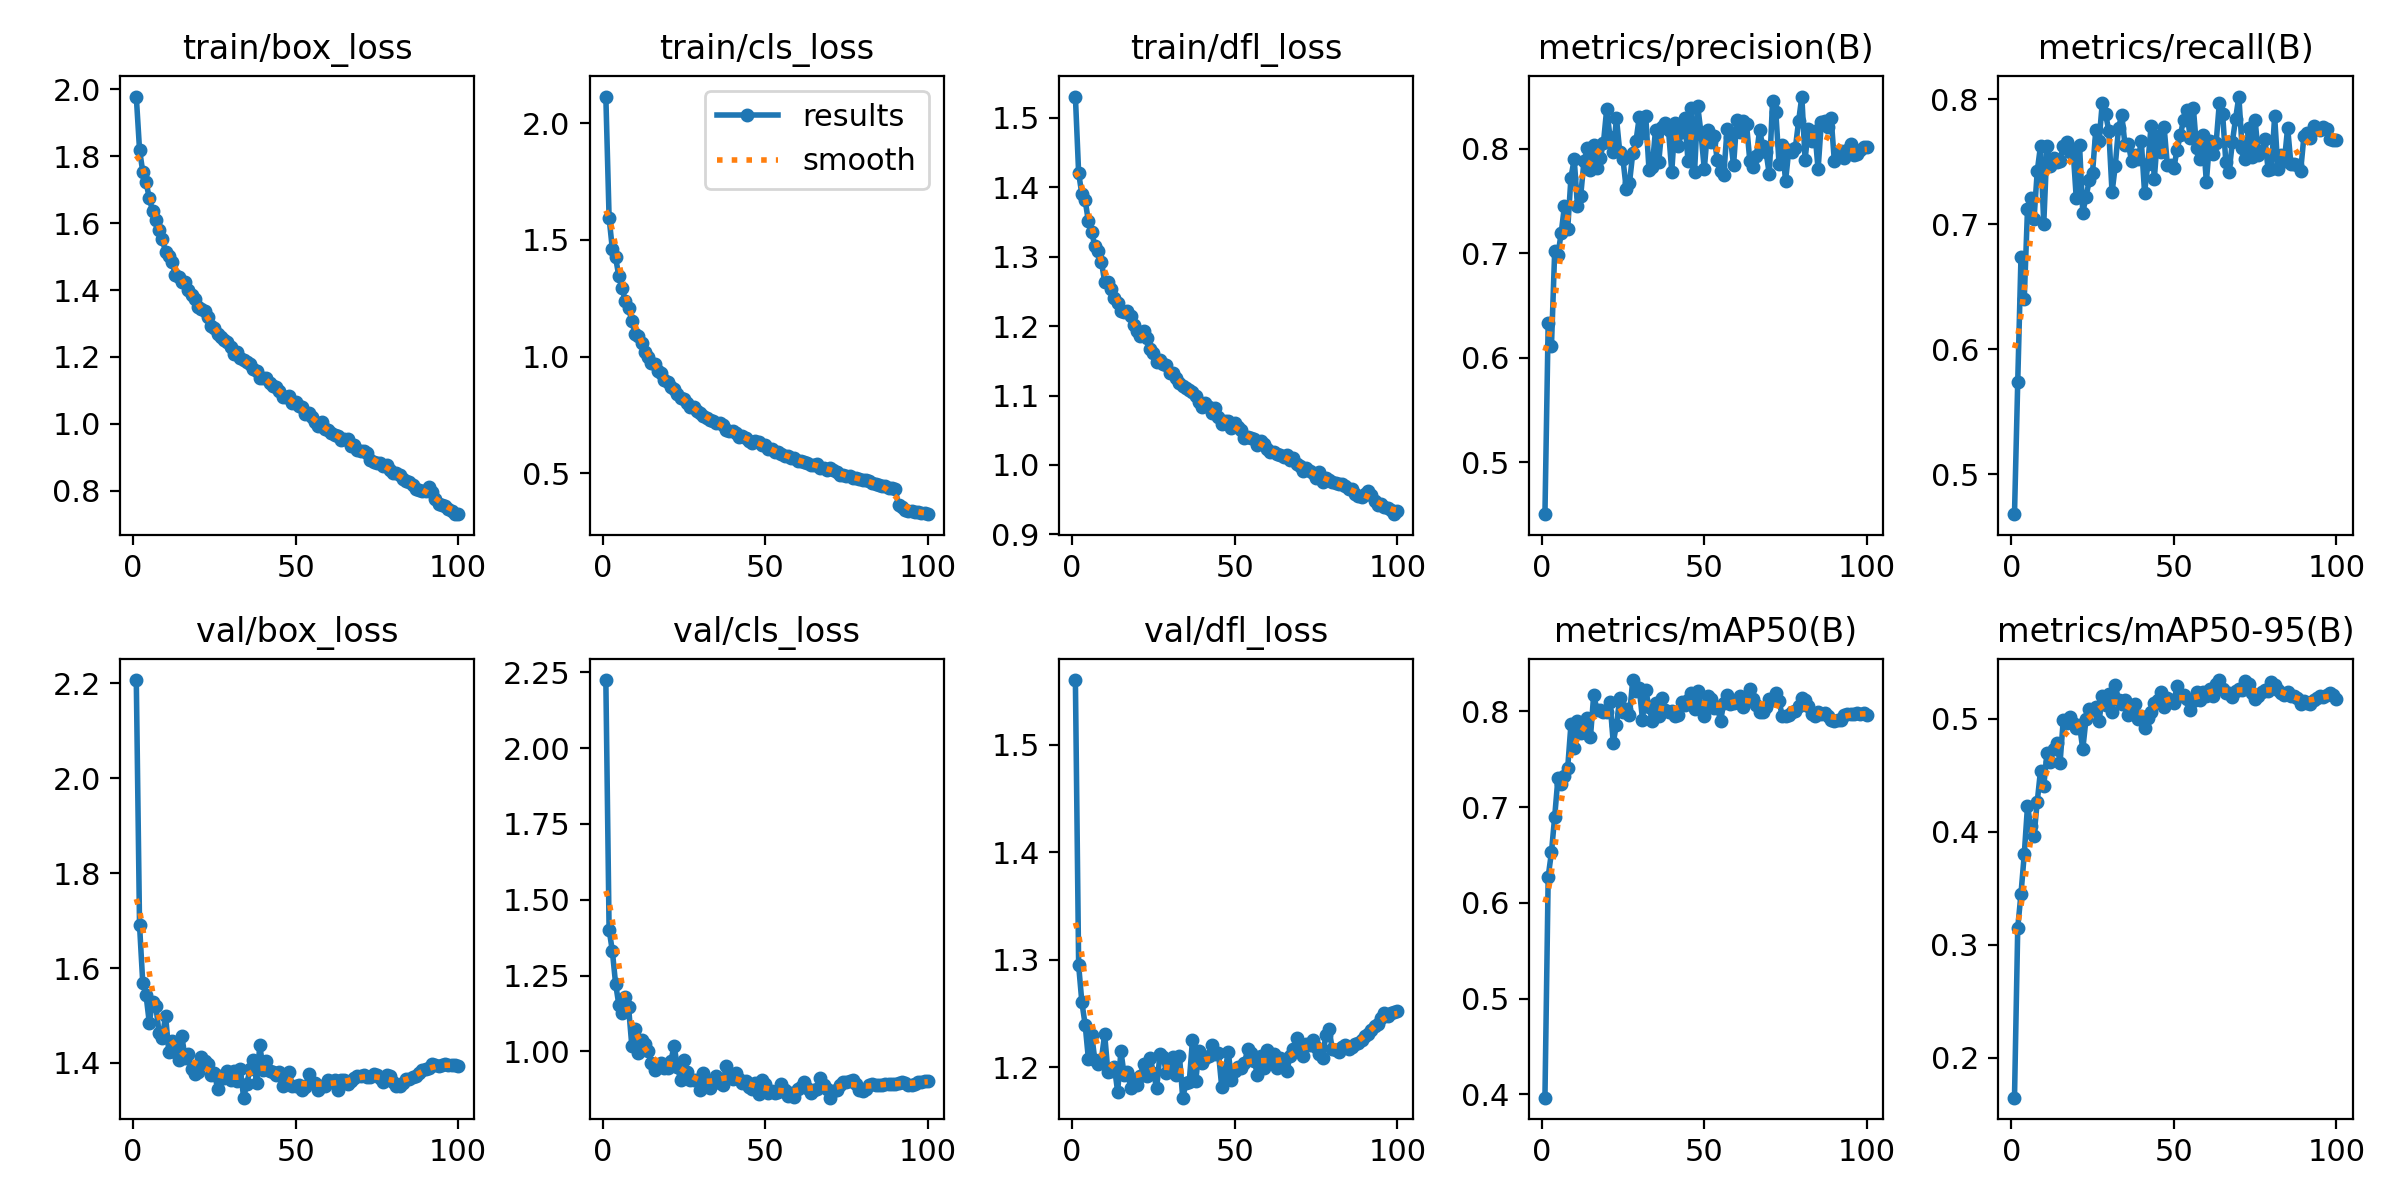

In [ ]:
from PIL import Image

Image.open("runs/detect/train/results.png")

In [20]:
!cat runs/detect/train/args.yaml

task: detect
mode: train
model: yolo11x.pt
data: /content/drive/MyDrive/Data/data.yaml
epochs: 100
time: null
patience: 100
batch: 32
imgsz: 320
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: train
exist_ok: false
pretrained: true
optimizer: AdamW
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: null
multi_scale: false
compile: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: true
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
keras: false
optimize: false
int8: false
dynam

In [21]:
!ls -lh runs/detect/train/weights

total 219M
-rw------- 1 root root 110M Oct 28 14:31 best.pt
-rw------- 1 root root 110M Oct 28 14:31 last.pt


In [ ]:
Image.open("runs/detect/train/train_batch0.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [23]:
Image.open("runs/detect/train/val_batch0_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

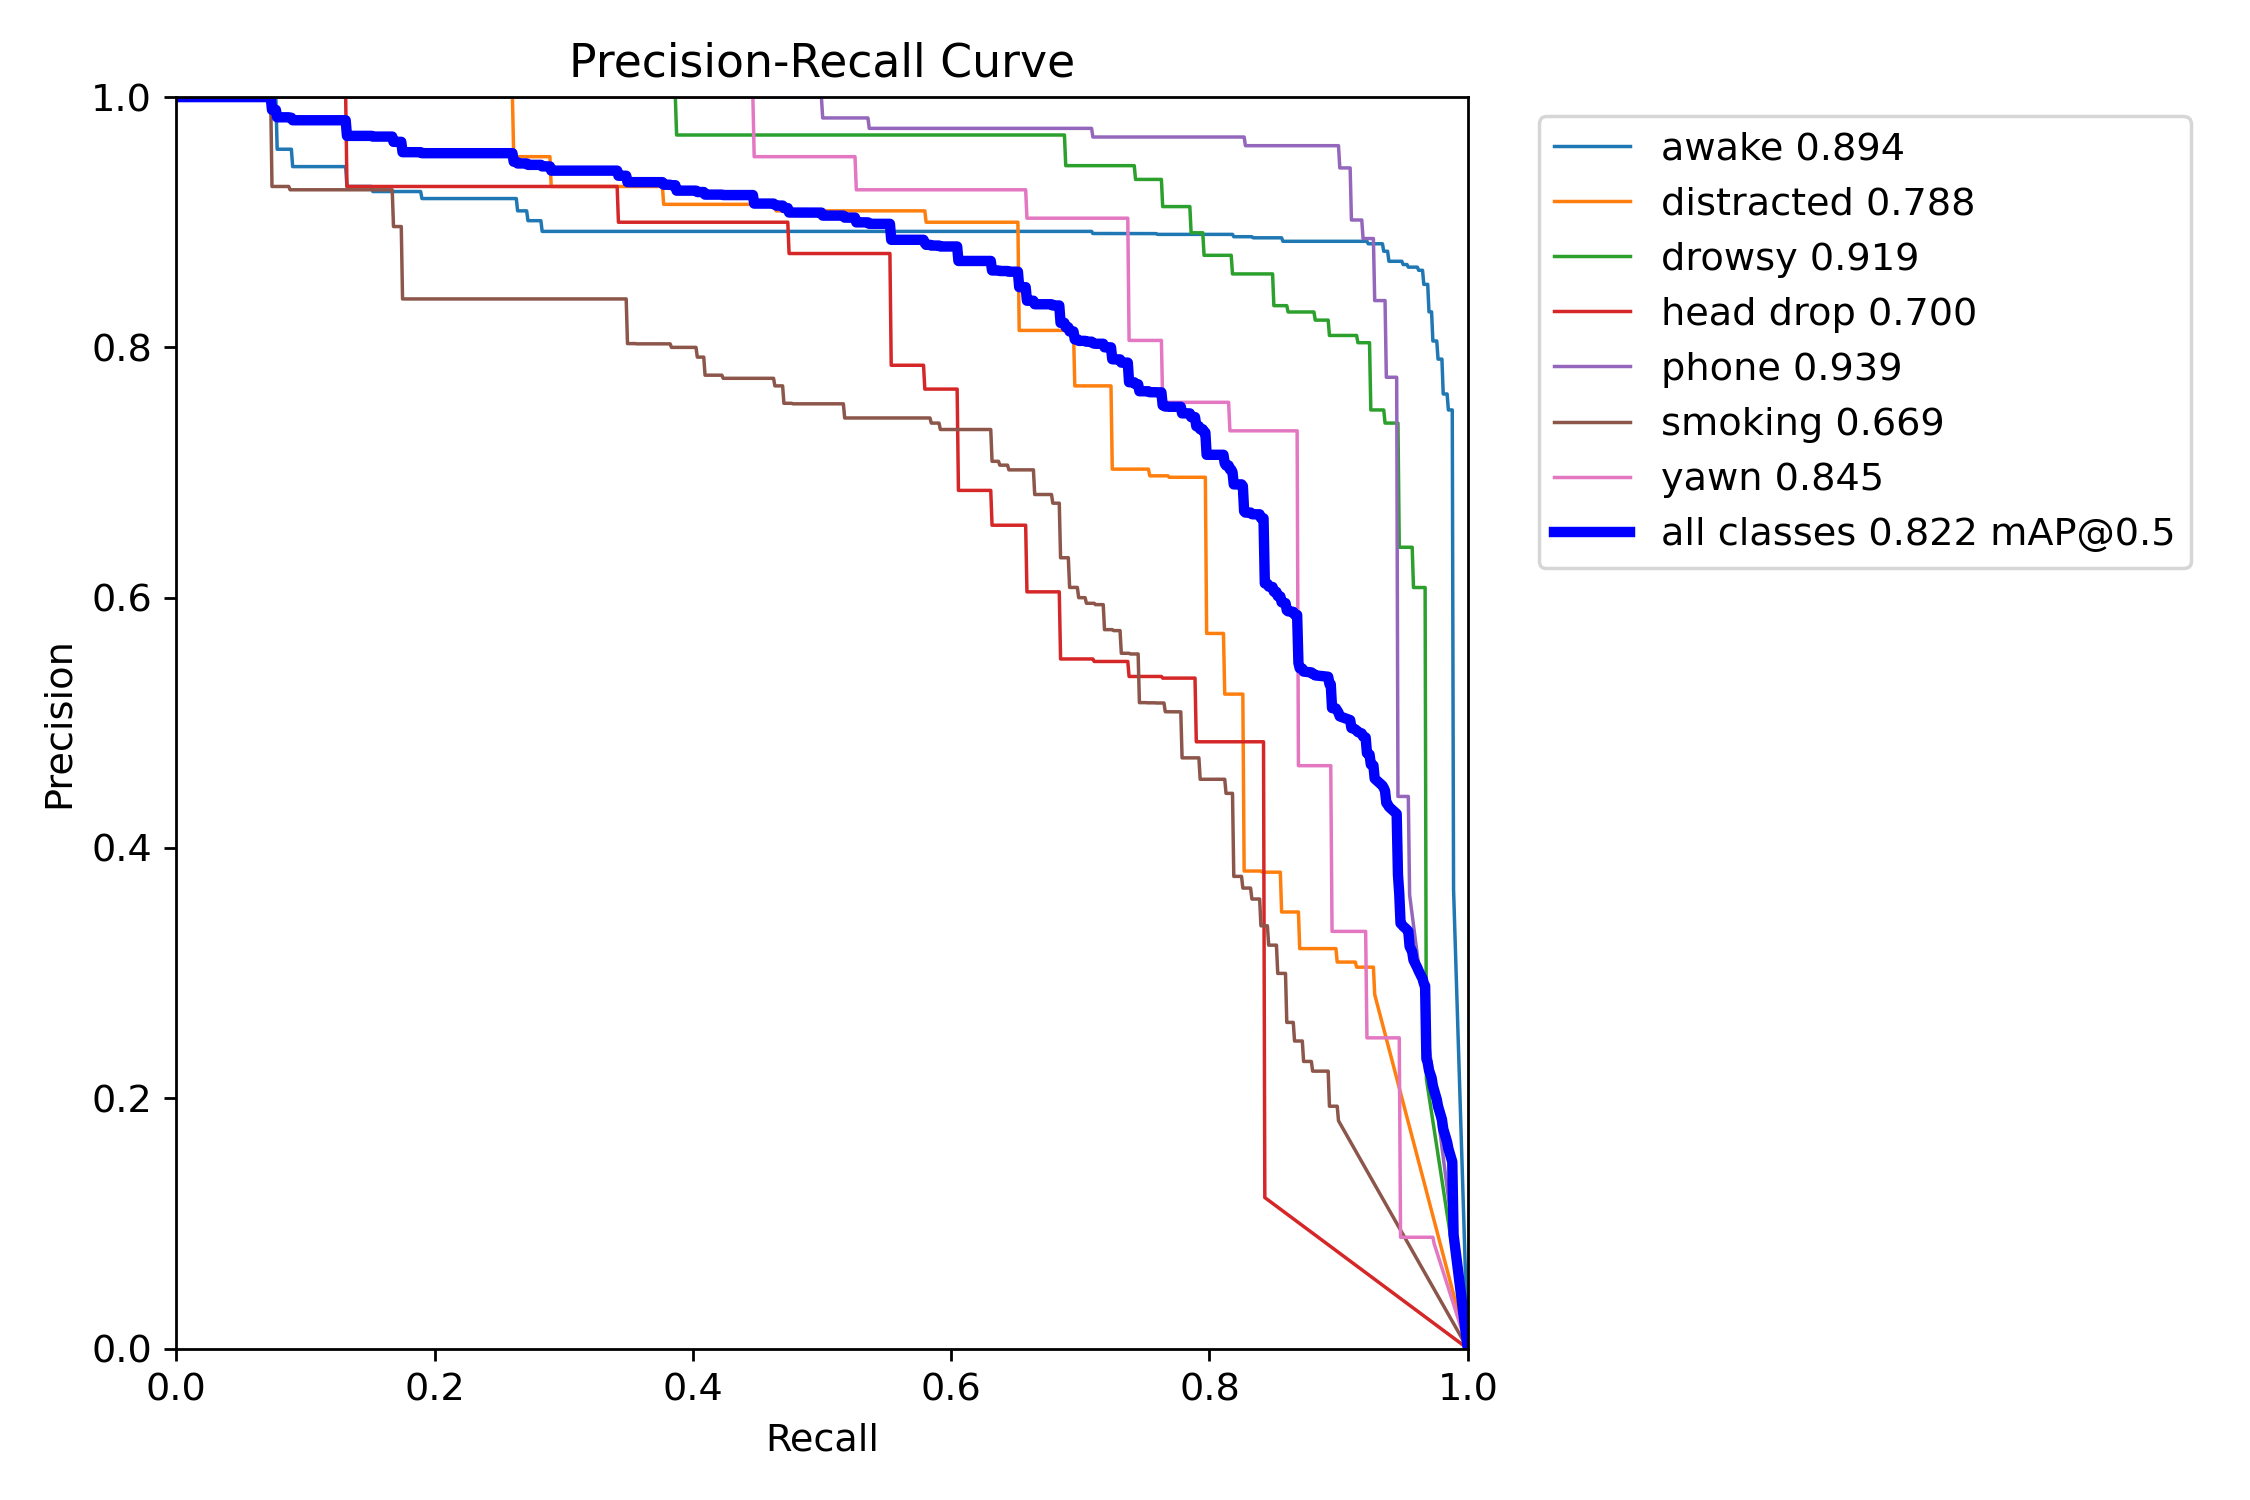

In [25]:
Image.open("runs/detect/train/BoxPR_curve.png")

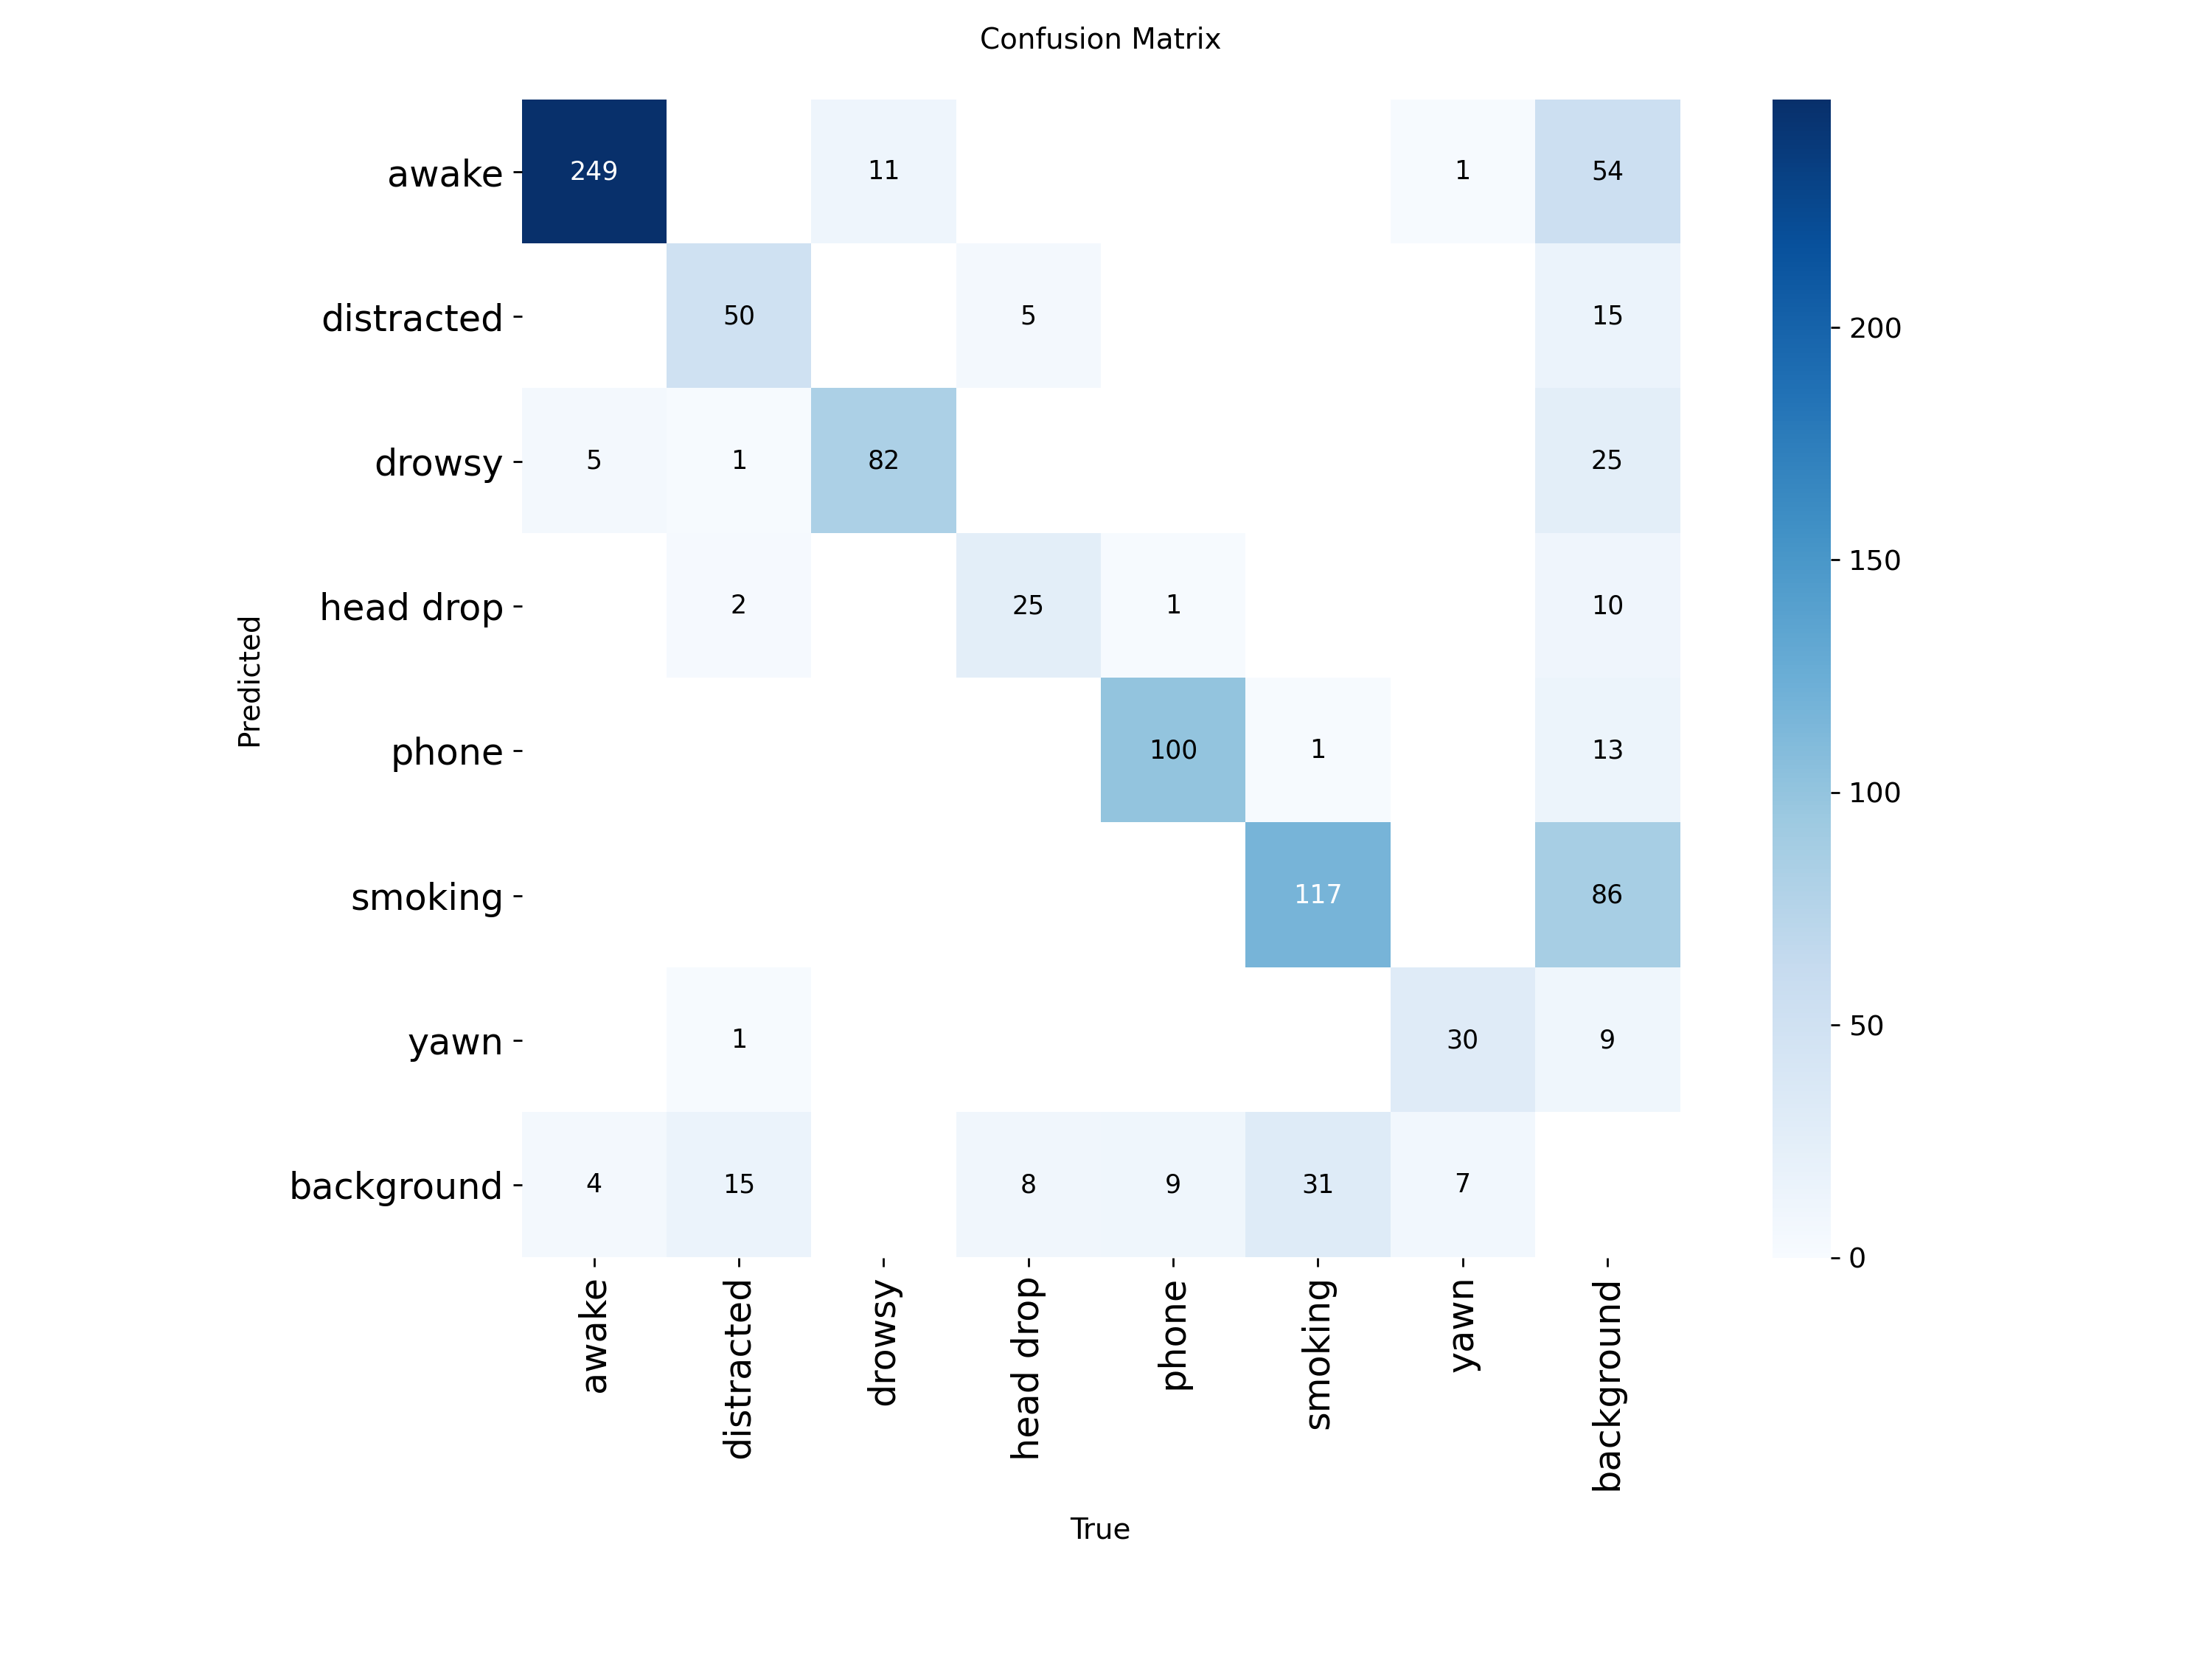

In [26]:
Image.open("runs/detect/train/confusion_matrix.png")

In [28]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/Data/valid/images/-1076-_mp4-84_jpg.rf.a81f6ada6303f1334db3deb9c2b548d3.jpg

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,835,109 parameters, 0 gradients, 194.4 GFLOPs

image 1/1 /content/drive/MyDrive/Data/valid/images/-1076-_mp4-84_jpg.rf.a81f6ada6303f1334db3deb9c2b548d3.jpg: 320x320 1 awake, 35.5ms
Speed: 1.2ms preprocess, 35.5ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /content/drive/MyDrive/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
